<h1><strong>Events And Delegates</strong></h1>

Communication between objects
Building loosely coupled applications
Helps extending applications functionality without changing the existing code.

In [ ]:
// Arbitrary Code for understanding
/*

public class VideoEncoder
{
    public void Encode(Video video)
    {
        // .. performing encoding

        _mailService.Send(new Mail()); // Once encoding is completed, mail owner of the video.
    }
}

*/

In [ ]:
// Arbitrary Code for understanding
/*
public class VideoEncoder
{
    public void Encode(Video video)
    {
        // .. performing encoding

        _mailService.Send(new Mail()); // Once encoding is completed, mail owner of the video.

        // Later it is decided to text message the video owner as well.
        _textService.Send(new Text();  // Addition of this new extra service, might break things.
    }
}
*/

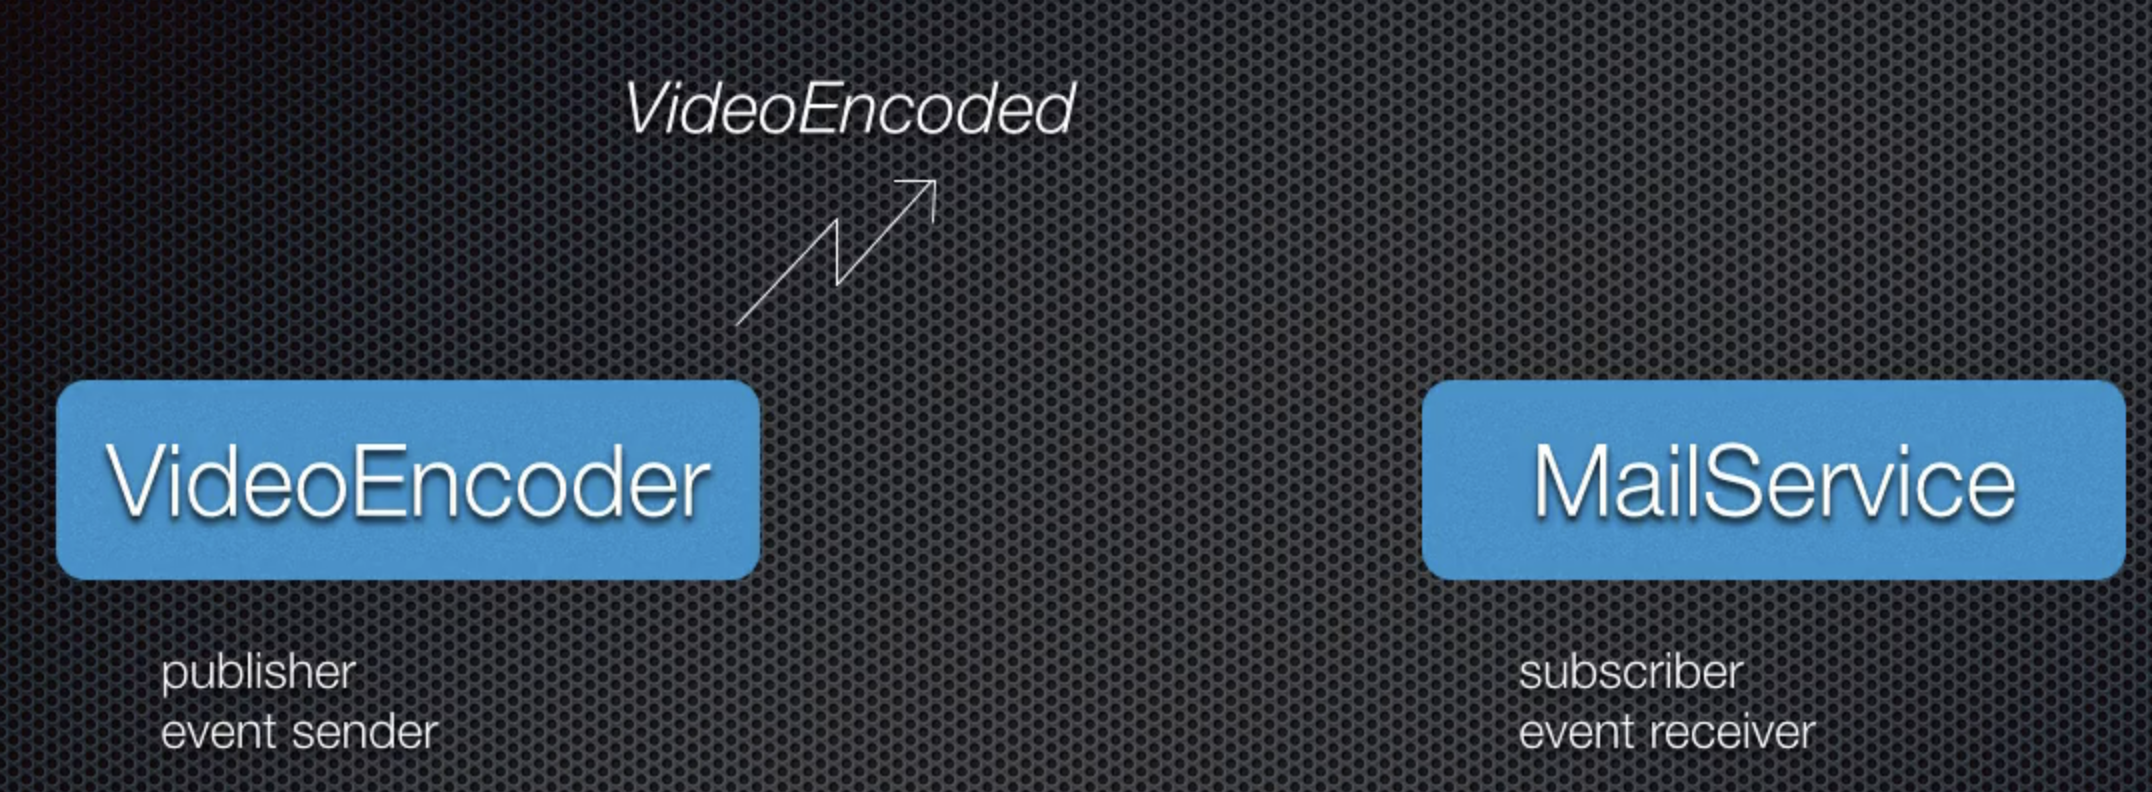

Video Encoder has absolutely no idea about MailService. Hence resulting in loose coupling. We can add more services later on without impacting the application.

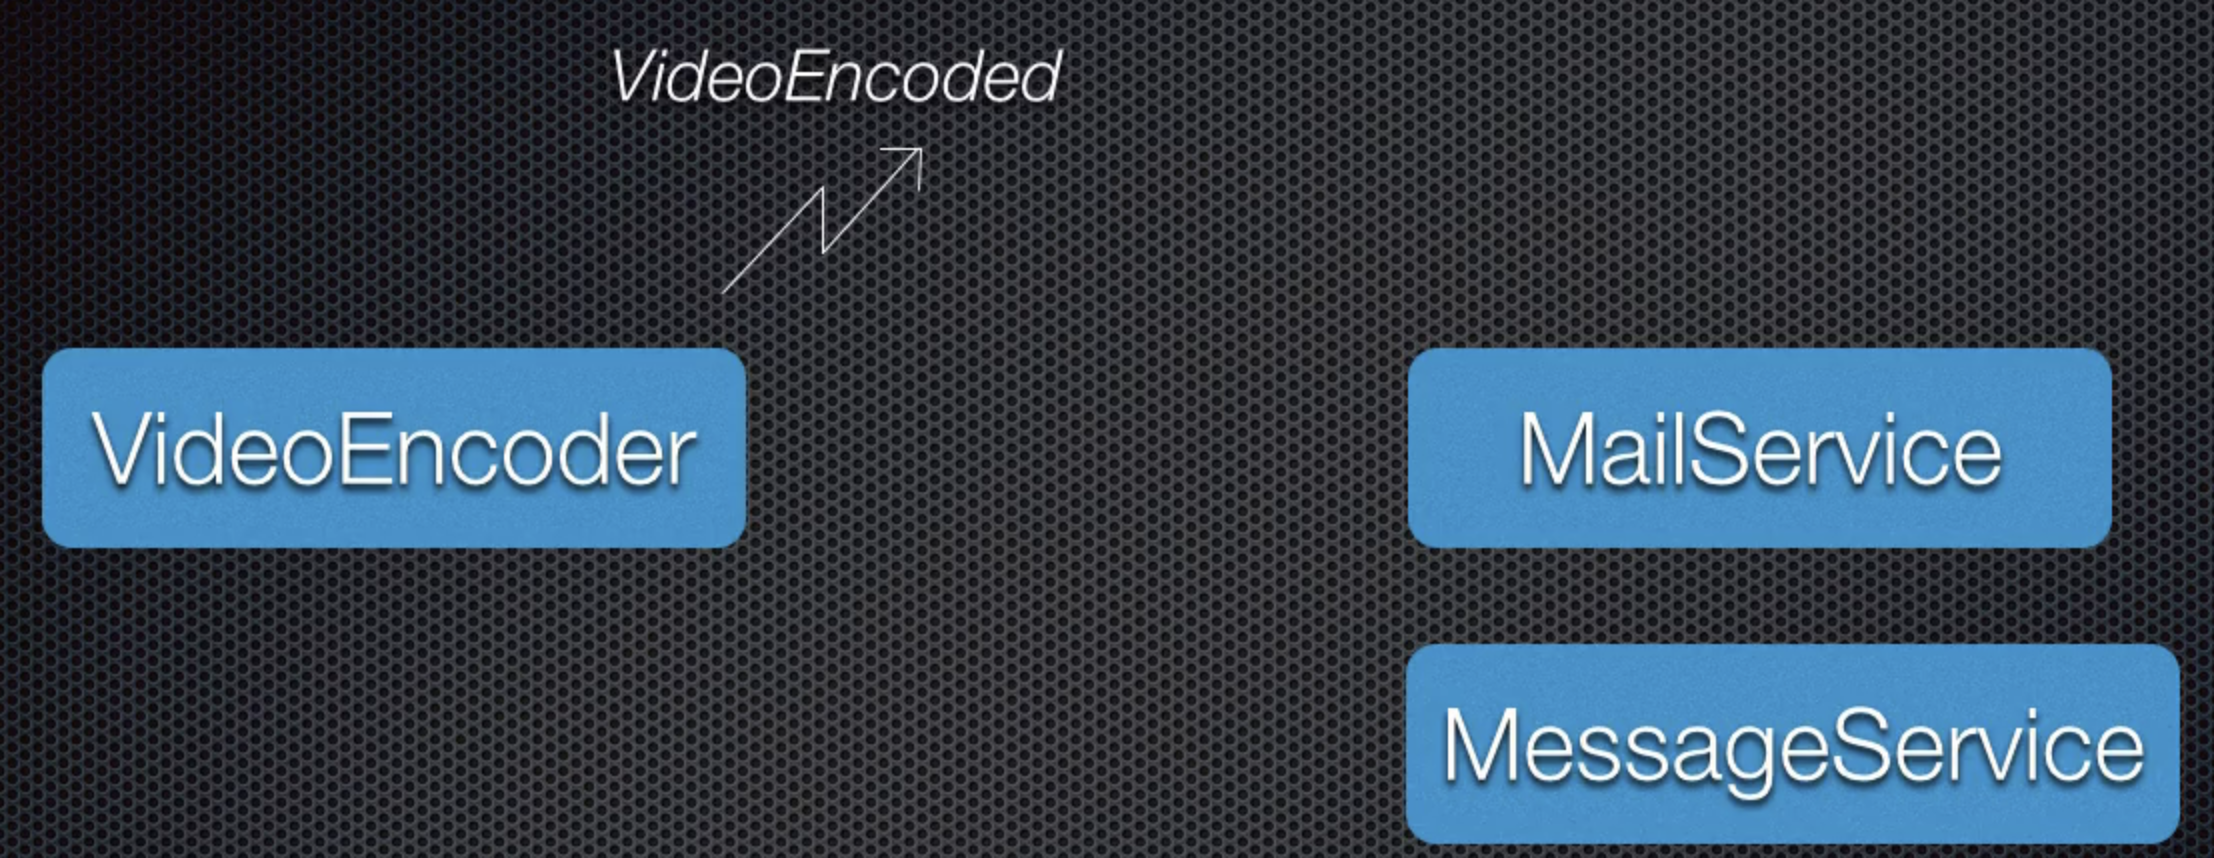

In [ ]:
// public class VideoEncoder
// {
//     public void Encode(Video video)
//     {
//         // Encoding Operation

//         OnVideoEncoded(); // More on this later.
//     }
// }

* How does publisher notify the subscribers?<br>
Publisher notifies the subscribers by emitting a message to them.
<br>
* How does publisher knows what message to send to the subscribers?<br>
Publisher has a contract implemented with each subscriber which helps it detemine what message to send to subscribers. <br>
Publisher and subscribers both agree upon the contract that is a method with a specific signature (delegate)
<br>

// Syntax for event handler in C#. This is typical implementation of a subscriber <br>
public void OnVideoEncoded(object source, EventArgs e)<br>
{
<br>
}

<h3>HANDS-ON EXAMPLE</h3>

Scenario without event delegation

In [2]:
public class Video
{
    public string Title {get; set;}
}

In [3]:
using System.Threading;

public class VideoEncoder
{
    public void Encode(Video video)
    {
        Console.WriteLine("Encoding the Video");
        Thread.Sleep(3000);
        // call services for post encoding operations
    }
}

In [4]:
// Driver Program
VideoEncoder encoder = new VideoEncoder();

encoder.Encode(new Video{ Title = "Video 1" });

Encoding the Video


Scenario with Event Delegation

<strong>Steps to enable a class to publish events to the subscribers.</strong> <br>

1. Define a delegate in the publisher class. This will be the contract between the publisher and the subscribers. <br>
    * This method will eventually be an event handler in the subscribers. <br>
    * In .Net, the convention is that the first argument is any object / class that is publishing or sending the event. <br>
    * The second argument is the data that is to be sent along with the event. <br>
2. Define an event based on that delegate. <br>
3. Raise the event. <br>



In [5]:
public class Video      // Data Model
{
    public string Title {get; set;}
}

In [6]:
// PUBLISHER 
// Lets make the VideoEncoder class a publisher
using System.Threading;
public class VideoEncoder
{

    public delegate void VideoEncodedEventHandler(object source, EventArgs args);   // 1. Define a delegate (Contract) 
    public event VideoEncodedEventHandler VideoEncoded;                             // 2. Define an event based on the delegate. (Event Handler Methods in subscribers are assigned to this event)
    
    // public event Action<object,EventArgs> VideoEncoded;                          // This line of code is equivalent to the two lines above. (Demostration of using built-in Action delegate)

    public void Encode(Video video)
    {
        Console.WriteLine("Encoding the video");
        Thread.Sleep(6000);
        
        OnVideoEncoded();                                                           // Calling this will notify all the subscribers.
    }

    protected virtual void OnVideoEncoded()                                         // 3. Event Publishing Method
    {
        if(VideoEncoded is not null)                                                // If VideoEncoded is not empty it means some class has subscribed to the event, VideoEncoded;
            VideoEncoded(this, EventArgs.Empty);
    }
}

<strong>
    <u>
        Note:
    </u>
</strong>
 Naming Convention for event Contract (delegate) in .Net is such that name of the event followed by the phrase "EventHandler". Hence event in the above class is named as VideoEncoded, the name of the event, followed by the phrase "EventHandler". <br>

<strong>
    <u>
        Note:
    </u>
</strong>
 Naming convention for event publishing method, used to raise the event, is to be defined such that it is has following criteria <br>
It is <br>
* Private <br>
* virutal <br>
* returns void <br>
* Name starts with On followed by the name of event it is raising. <br>

In [7]:
Video video = new Video();
VideoEncoder encoder = new VideoEncoder();
encoder.Encode(video);

Encoding the video


The Encoding was done and no post encoding operations were performed since no service was subscribed to the event, VideoEncoded, in the publisher class, VideoEncoder. <br>
Lets create a service that sends a mail to the user informing them about the recent development. 

In [8]:
public class MailService
{
    public void OnVideoEncodedHandler(object source, EventArgs args)
    {
        Console.WriteLine("The video has been ecoded. This mail is auto generated. Please dont reply.");
    }
}

In [9]:
public class CloudBackupService
{
    public void OnVideoEncodedSaveInCloud(object emitter, EventArgs supplementalData)       // Breaking naming convention of event handling methods. Just a convention, Not a hard fast Rule. But good practice.
    {
        Console.WriteLine("The encoded video is being saved in the cloud");
        Console.Write(".");
        Thread.Sleep(2000);                                                                 // Simulating the video saving operation.
        Console.Write(".");
        Thread.Sleep(2000);                                                                 // Simulating the video saving operation.
        Console.Write(".");
        Thread.Sleep(2000);                                                                 // Simulating the video saving operation.
        Console.Write(".");
        Thread.Sleep(2000);                                                                 // Simulating the video saving operation.
        Console.WriteLine(".");
        Thread.Sleep(2000);                                                                 // Simulating the video saving operation.
        Console.WriteLine("The video has been saved.");
    }
}

In [11]:
Video video = new Video();
VideoEncoder encoder = new VideoEncoder();                          // Publisher
MailService mailService = new MailService();                        // Subscriber
encoder.VideoEncoded += mailService.OnVideoEncodedHandler;          // Subscribing a subscriber

CloudBackupService cloudService = new CloudBackupService();         // Subscriber
encoder.VideoEncoded += cloudService.OnVideoEncodedSaveInCloud;     // Subscribing. (No Parenthesisi Please. No intention of calling. Just Passing the reference as explained earlier)

encoder.Encode(video);

Encoding the video
The video has been ecoded. This mail is auto generated. Please dont reply.
The encoded video is being saved in the cloud
.....
The video has been saved.


<strong>
    <u>
        Note:
    </u>
</strong>
 The order in which services are subscribed to the event in the published determines the order of executing the services.

We can add as many services as we like without havning to change any code in the publisher class. It can be a part of a class library that is never touched. This way Publisher class will never have to be recomplied. It makes different parts of the application loosely coupled, allowing developers to introduce new features quickly and at the same time without having to alter the existing code.

Can Event delegation, we just learnt above, be considered as a design pattern? since it is based on Publisher and subcriber. I guess publisher and subscriber is a well known design pattern so we should not be shy call event delegation desing pattern. Its just my opinion :)

<h3>Sending data along with the event from publisher to subscriber</h3>

What if subscribers need to be provided with some data along with the event sent from the publisher? <br>

In order to send data to subscriber along with the event, we need to <br>
* Derive a custom class from EventArgs class. <br>
* Create a property with type corresponding to the data that needs to be sent to subscriber. (Video in our example) <br>
* Modify the type of second parameter to accept the custom class instance. <br>
* Pass the instance of custom class to the delegate as a second parameter. <br>

In [13]:
// Custom class
public class VideoEventArgs : EventArgs
{
    public Video video {get;set;}
}

In [14]:
// PUBLISHER 
// Lets make the VideoEncoder class a publisher
using System.Threading;
public class VideoEncoder
{
    public delegate void VideoEncodedEventHandler(object source, VideoEventArgs args);   // 1. Define a delegate (Contract) 
    public event VideoEncodedEventHandler VideoEncoded;                                 // 2. Define an event based on the delegate. (Event Handler Methods in subscribers are assigned to this event)
    
    // public event Action<object,EventArgs> VideoEncoded;                          // This line of code is equivalent to the two lines above. (Demostration of using built-in Action delegate)

    public void Encode(Video video)
    {
        Console.WriteLine("Encoding the video");
        Thread.Sleep(6000);
        
        OnVideoEncoded(video);                                                           // Calling this will notify all the subscribers.
    }

    protected virtual void OnVideoEncoded(Video video)                                         // 3. Event Publishing Method
    {
        if(VideoEncoded is not null)                                                // If VideoEncoded is not empty it means some class has subscribed to the event, VideoEncoded;
            VideoEncoded(this, new VideoEventArgs{video = video});
    }
}

In [15]:
public class MailService
{
    public void OnVideoEncodedHandler(object source,VideoEventArgs args)
    {
        Console.WriteLine("The video with Title : " + args.video.Title +  " has been ecoded. This mail is auto generated. Please dont reply.");
    }
}

In [16]:
Video video = new Video(){Title = "Man Vs Wild"};

VideoEncoder encoder = new VideoEncoder();                          // Publisher
MailService mailService = new MailService();                        // Subscriber
encoder.VideoEncoded += mailService.OnVideoEncodedHandler;          // Subscribing a subscriber

// CloudBackupService cloudService = new CloudBackupService();         // Subscriber
// encoder.VideoEncoded += cloudService.OnVideoEncodedSaveInCloud;     // Subscribing. (No Parenthesisi Please. No intention of calling. Just Passing the reference as explained earlier)

encoder.Encode(video);

Encoding the video
The video with Title : Man Vs Wild has been ecoded. This mail is auto generated. Please dont reply.


<h3>Short way of defining an event without having to explicitly define a delegate inside publisher class. (Introduced in .Net 2.0) </h3>

Two forms of delegate specific to events are <br> 
* EventHandler <br>
* EventHandler< Additional Data to be sent to subscriber > <br>
One is generic and other one is non-generic.

In [17]:
using System.Threading;
public class VideoEncoder
{ 
    public event EventHandler<VideoEventArgs> VideoEncoded;                                 // 2. Define an event based on the delegate. (Event Handler Methods in subscribers are assigned to this event)

    public void Encode(Video video)
    {
        Console.WriteLine("Encoding the video");
        Thread.Sleep(6000);
        
        OnVideoEncoded(video);                                                           // Calling this will notify all the subscribers.
    }

    protected virtual void OnVideoEncoded(Video video)                                         // 3. Event Publishing Method
    {
        if(VideoEncoded is not null)                                                // If VideoEncoded is not empty it means some class has subscribed to the event, VideoEncoded;
            VideoEncoded(this, new VideoEventArgs{video = video});
    }
}